# **Laboratorio 1.0: Series de tiempo**

Estudiante: Alejandra Arciniegas Marin
Cédula : 1000662159

In [472]:
!pip install -q fitter

In [473]:
#@title Importar Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from fitter import Fitter, get_common_distributions, get_distributions
import re

In [474]:
#Clonar el dataset para leerlo desde Github
!git clone 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv'

Cloning into 'Pandas_data_historical_dataEURUSD.csv'...
remote: 404: Not Found
fatal: repository 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv/' not found


In [475]:
#@title 1. Leer el dataset desde el github
data = 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv'
df = pd.read_csv(data)
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


In [476]:
df = df.drop(columns = ['Unnamed: 0']) #Eliminar la columna Unnamed porque no tiene info útil

In [477]:
#@title 2. Definir como índice la columna time

df = df.set_index('time')
df.index = pd.to_datetime(df.index, errors='coerce') #Volver el tiempo un objeto de tipo time
df

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


In [478]:
#Seleccionar únicamente la columna con el precio de cierre para graficarla y ver los datos
close = df['close']
close

,close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


In [479]:
#@title 3. Obtenga información del data frame.
df.shape #Dimensiones en filas y columnas

(5000, 11)

In [480]:

df.info()
'''
De aquí podemos ver que hay 5000 filas en todo el dataframe y en ninguna columna
hay información NaN, el precio, hay además 11 columnas, los tiempos van desde
Julio de 2022 a Diciembre de 2023.
'''

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                5000 non-null   float64
 1   high                5000 non-null   float64
 2   low                 5000 non-null   float64
 3   close               5000 non-null   float64
 4   tick_volume         5000 non-null   int64  
 5   spread              5000 non-null   int64  
 6   real_volume         5000 non-null   int64  
 7   MeanCloseOpen       5000 non-null   float64
 8   Diff_Close          5000 non-null   float64
 9   Diff_Open           5000 non-null   float64
 10  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 468.8 KB


'\nDe aquí podemos ver que hay 5000 filas en todo el dataframe y en ninguna columna\nhay información NaN, el precio, hay además 11 columnas, los tiempos van desde\nJulio de 2022 a Diciembre de 2023.\n'

In [481]:
#@title 4. Determine si hay null, nan en el data frame
df.isnull().values.any() #Como vimos en el literal anterior, no hay valores NaN en el dataframe

False

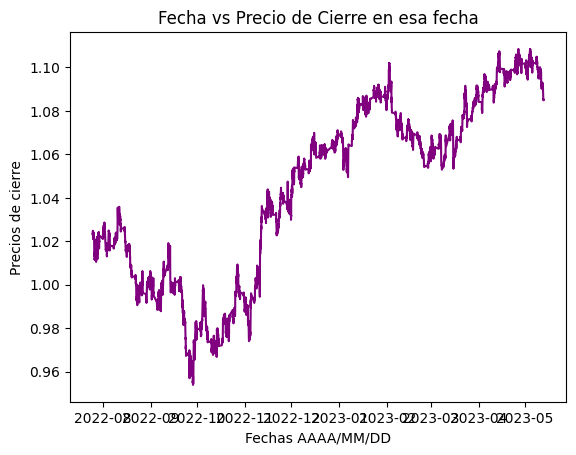

In [482]:
plt.title('Fecha vs Precio de Cierre en esa fecha')
plt.plot(close, color = 'purple')
plt.xlabel('Fechas AAAA/MM/DD')
plt.ylabel('Precios de cierre')
plt.show()

In [483]:
#@title 5. Emplea la notacion Pascal Case y trabaja solo con la columna del precio de cierre del eur/usd.

#Función para pasar los nombres de las columnas a Pascal Case
def PascalCase(df):
  df_columns = [] #Lista vacía para guardar los nuevos nombres de las columnas

  for x in df.columns: #Recorrer cada título de las columnas
    if '_' in x: #Para los que tengan guión bajo, eliminamos el guión y ponemos en mayúscula la primera letra de cada palabra
        x_sep = x.split("_")
        x_new = ''
        for i in x_sep:
          if i.islower(): i = i.capitalize()
          x_new += i
        df_columns.append(x_new) #Agregar el nombre nuevo de la columna a la lista
    else:
      if x[0].islower(): #Y si no tiene guiones pero la inicial está en minúscula, la pongo en mayúscula
        x = x.capitalize()
        df_columns.append(x)
      else: df_columns.append(x)

  df.columns = df_columns


In [484]:
PascalCase(df)

In [485]:
df

,Open,High,Low,Close,TickVolume,Spread,RealVolume,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


In [486]:
#@title 6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
# Calculamos la diferencia entre las filas del dataframe porque están separadas por una hora
df['DiffPrice'] = df['Close'].diff()
df

,Open,High,Low,Close,TickVolume,Spread,RealVolume,MeanCloseOpen,DiffClose,DiffOpen,DiffMeanCloseOpen,DiffPrice
time,,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640,NaN
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640,-0.00046
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580,0.00158
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895,0.00028
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365,-0.00304
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545,-0.00038
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020,0.00032
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075,-0.00015


In [487]:
df2 = df[['Close', 'DiffPrice']] #Creamos otro dataframe solo con los precios de cierre y las diferencias entre precios de cierre
df2.dropna(inplace = True)
df2

<ipython-input-487-0583a952cf0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace = True)


,Close,DiffPrice
time,,
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
2022-07-25 18:00:00,1.02099,-0.00082
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


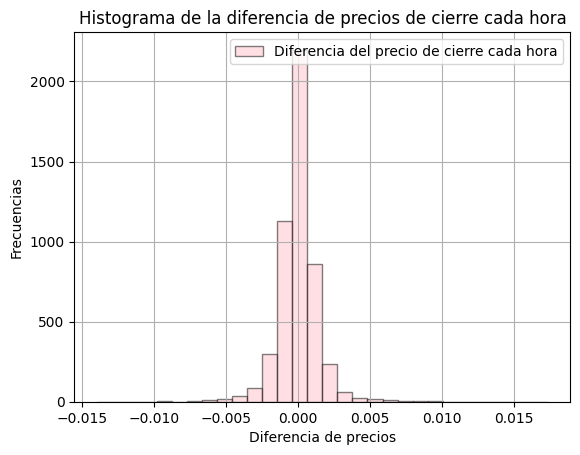

In [488]:
#Crear el gráfico de las distribuciones de las diferencias de precio de cierre cada hora

plt.title('Histograma de la diferencia de precios de cierre cada hora')
plt.hist(df2['DiffPrice'], bins = 30, alpha = 0.5, label =  'Diferencia del precio de cierre cada hora', edgecolor = 'black', color = 'pink')
plt.xlabel('Diferencia de precios')
plt.ylabel('Frecuencias')
plt.grid()
plt.legend()
plt.show()

{'johnsonsu': {'a': -0.020654532350683215,
  'b': 1.049797421216857,
  'loc': -1.5194909287993722e-05,
  'scale': 0.0008808828671326262}}

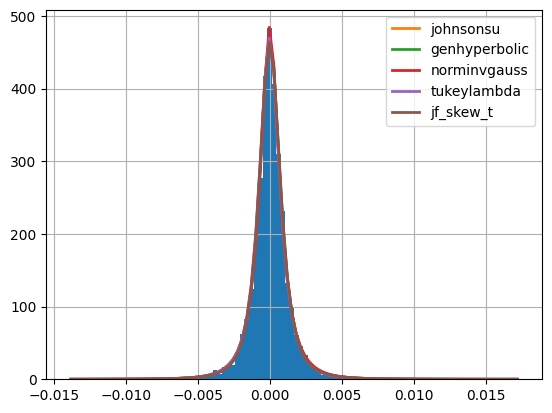

In [489]:
#Buscar la distribución que mejor se ajusta al histograma

diff_prices = df2['DiffPrice'].to_numpy()
f = Fitter(diff_prices,
           distributions= get_distributions())


f.fit()
f.summary()

# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')


In [490]:
#@title 7. Para el data frame, seleccionemos solo los datos del 2023
df_2023 = df2[df2.index.year == 2023]
df_2023

,Close,DiffPrice
time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


In [491]:
#@title 8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

#Para la periodicidad de 15 días, los promedios son:
df_15 = (df_2023.groupby(pd.Grouper(freq = '15D')))
df_15.mean()


,Close,DiffPrice
time,,
2023-01-02,1.069361,0.000047
2023-01-17,1.085565,0.000015
2023-02-01,1.077679,-0.000066
2023-02-16,1.063150,-0.000034
2023-03-03,1.063186,0.000026
2023-03-18,1.080936,0.000074
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000006
2023-05-02,1.098889,-0.000059


In [492]:
#Para la periodicidad de una semana, los promedios son:
df_1w = (df_2023.groupby(pd.Grouper(freq = '1W')))
df_1w.mean()

,Close,DiffPrice
time,,
2023-01-08,1.059972,-0.000047
2023-01-15,1.076002,0.000156
2023-01-22,1.082041,0.000020
2023-01-29,1.088414,0.000010
2023-02-05,1.089281,-0.000062
2023-02-12,1.073363,-0.000097
2023-02-19,1.069648,0.000014
2023-02-26,1.063374,-0.000124
2023-03-05,1.060854,0.000073


In [493]:
#Para la periodicidad de un mes, los promedios son:
df_1m = (df_2023.groupby(pd.Grouper(freq = '1M')))
df_1m.mean()

,Close,DiffPrice
time,,
2023-01-31,1.077463,0.000031
2023-02-28,1.071167,-0.000060
2023-03-31,1.070874,0.000049
2023-04-30,1.096051,0.000036
2023-05-31,1.098980,-0.000069


In [494]:
#@title 9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes. Para ello puedo emplear el metodo groupby.

'''
Para poder iterar sobre el elemento resultante de aplicar el método Groupby,
vamos a separar cada subtabla de cada año en tuplas y vamos a guardar cada una
de estas tuplas dentro de un arreglo. El primer elemento de cada tiempo va a corresponder
al último tiempo de ese mes y el segundo elemento de la tupla es el dataframe con
precios de cierre y diferencia de precios de cierre para todos los tiempos de dicho mes.
'''

arr = []
for group in df_1m:
  arr.append(group)

len(arr), arr[0], type(arr[0])

(5,
 (Timestamp('2023-01-31 00:00:00'),                        Close  DiffPrice
  time                                   
  2023-01-02 00:00:00  1.06796   -0.00200
  2023-01-02 01:00:00  1.06965    0.00169
  2023-01-02 02:00:00  1.07058    0.00093
  2023-01-02 03:00:00  1.06896   -0.00162
  2023-01-02 04:00:00  1.06880   -0.00016
  ...                      ...        ...
  2023-01-31 19:00:00  1.08651    0.00081
  2023-01-31 20:00:00  1.08724    0.00073
  2023-01-31 21:00:00  1.08641   -0.00083
  2023-01-31 22:00:00  1.08724    0.00083
  2023-01-31 23:00:00  1.08618   -0.00106
  
  [528 rows x 2 columns]),
 tuple)

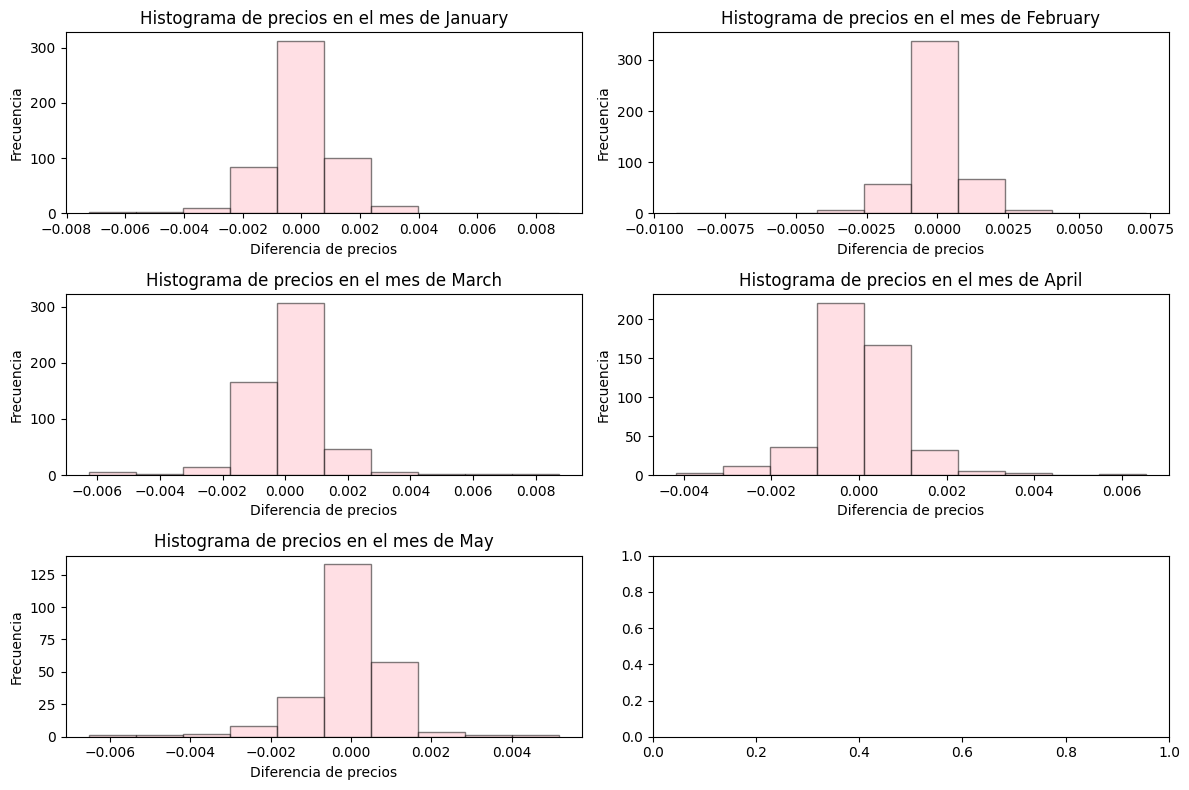

In [495]:
#Crear la gráfica con las distribuciones para cada mes

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Plot 1: Mes 1
axes[0, 0].hist(arr[0][1]['DiffPrice'], color = 'pink', alpha = 0.5, edgecolor = 'black')
axes[0, 0].set_title(f'Histograma de precios en el mes de {arr[0][0].month_name()}')
axes[0, 0].set_xlabel('Diferencia de precios')
axes[0, 0].set_ylabel('Frecuencia')

#Plot 2: Mes 2
axes[0, 1].hist(arr[1][1]['DiffPrice'], color = 'pink', alpha = 0.5, edgecolor = 'black')
axes[0, 1].set_title(f'Histograma de precios en el mes de {arr[1][0].month_name()}')
axes[0, 1].set_xlabel('Diferencia de precios')
axes[0, 1].set_ylabel('Frecuencia')

#Plot 3: Mes 3
axes[1, 0].hist(arr[2][1]['DiffPrice'], color = 'pink', alpha = 0.5, edgecolor = 'black')
axes[1, 0].set_title(f'Histograma de precios en el mes de {arr[2][0].month_name()}')
axes[1, 0].set_xlabel('Diferencia de precios')
axes[1, 0].set_ylabel('Frecuencia')

#Plot 2: Mes 4
axes[1, 1].hist(arr[3][1]['DiffPrice'], color = 'pink', alpha = 0.5, edgecolor = 'black')
axes[1, 1].set_title(f'Histograma de precios en el mes de {arr[3][0].month_name()}')
axes[1, 1].set_xlabel('Diferencia de precios')
axes[1, 1].set_ylabel('Frecuencia')

#Plot 2: Mes 5
axes[2, 0].hist(arr[4][1]['DiffPrice'], color = 'pink', alpha = 0.5, edgecolor = 'black')
axes[2, 0].set_title(f'Histograma de precios en el mes de {arr[4][0].month_name()}')
axes[2, 0].set_xlabel('Diferencia de precios')
axes[2, 0].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# **Laboratorio 1.1: Pandas**

In [496]:
#@title Leer los datos desde una página web.
!pip install -q ucimlrepo

In [497]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

#datos
X

'''Esta forma de leer los datos se sacó directamente de la página donde está el dataset, por eso ellos separan los targets (el diagnóstico) en un dataframe,
y los features en otro dataframe distinto'''

'Esta forma de leer los datos se sacó directamente de la página donde está el dataset, por eso ellos separan los targets (el diagnóstico) en un dataframe,\ny los features en otro dataframe distinto'

In [498]:
#title 2. Renombrar las columnas en formato PascalCase.
PascalCase(X) #Se  utiliza la función que ya habíamos creado en la parte de arriba en la parte de series de tiempo
X

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [499]:
#@title 3. Utilizar los métodos head(), tail(), describe() e info() para obtener información sobre el DataFrame.

X.head() #Me muestra las cinco primeras filas del dataframe y los headers para poder entender mejor los datos

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [500]:
X.tail() #Me muestra las últimas 5 filas del dataset

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [501]:
X.describe()
'''Me muestra medidas estádisticas para cada columa como el número de datos no nulos,
la media, la desviación estándar, etc
'''

'Me muestra medidas estádisticas para cada columa como el número de datos no nulos,\nla media, la desviación estándar, etc\n'

In [502]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

In [503]:
#@title 4. Contabilizar la cantidad de valores nulos (null o NaN) en el DataFrame. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

'''Buscar si hay valores nulos y en caso de que sea verdadero,
quitarlos'''

if X.isnull().values.any():
  X.dropna()
  print("Valores nulos eliminados")
else: print("No hay valores nulos")

No hay valores nulos


In [504]:
#@title 5. Identificar los valores únicos en la columna target que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método unique() para mostrar estos valores.

y['Diagnosis'].unique() #Muestra una sola vez cada uno de los valores que hay en la columna dada

array(['M', 'B'], dtype=object)

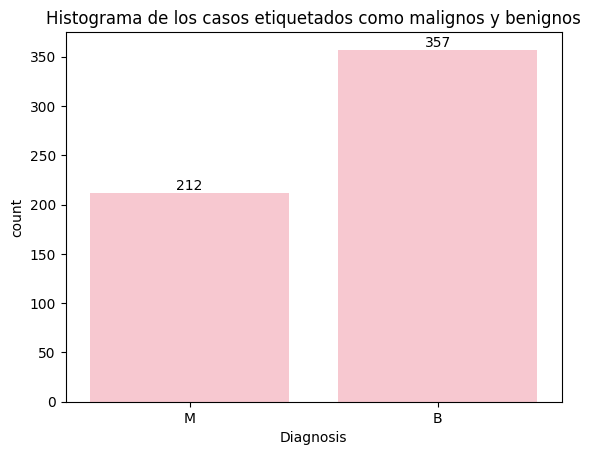

In [505]:
#@title 6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método countplot():

'''El método countplot permite hacer un histograma de variables cualitativas de un
conjunto de datos dado. En la primera entrada va el dataframe o el arreglo del que quiero sacar la info y
en la segunda la variable a graficar.
'''


ax = sns.countplot(y, x = 'Diagnosis', color = 'pink')
ax.bar_label(ax.containers[0]) #Mostrar el número exacto del conteo de dicha columna
plt.title('Histograma de los casos etiquetados como malignos y benignos')
plt.show()

In [506]:
#@title 7. Agregar una nueva columna llamada DiagnosisNumeric donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).
NumDiag = [] #lista vacía para agregar los unos y ceros de la nueva columna DiagnosisNumeric

for i in y['Diagnosis']: #Recorremos cada fila de la columna diagnóstico para ver sin es B o M
  if i == 'B': NumDiag.append(0) #Si es B agregamos un 0 y sino agregamos un 1
  else: NumDiag.append(1)

X['DiagnosisNumeric'] = NumDiag #Convertimos esta lista en la nueva columna DiagnosisNumeric del dataframe X
X

<ipython-input-506-ef734345d9e7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DiagnosisNumeric'] = NumDiag #Convertimos esta lista en la nueva columna DiagnosisNumeric del dataframe X


,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,DiagnosisNumeric
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [507]:
#@title 8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula: (x - mean(x)) / std(x))

for col in X: #Recorro sobre cada columna excepto la de DiagnosisNumeric porque en esa quiero conservar los ceros y unos correspondientes a M o B
  if col != 'DiagnosisNumeric':
    valores = X[col].values #Saco todos los valores de cada fila de esa columna y los convierno en un arreglo de numpy
    mean = np.mean(valores) #A ese arreglo le calculo la media y la desviación estándar
    std = np.std(valores)
    nuevos_valores = (valores - mean)/std #Asigno los nuevos valores con la fórmula dada en el enunciad0

    X[col] = nuevos_valores #Cambio la columna en el dataframe por la columna normalizada

X

<ipython-input-507-3d271bcb636f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = nuevos_valores #Cambio la columna en el dataframe por la columna normalizada


,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,DiagnosisNumeric
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1


In [519]:
#@title 9. Agrupar características similares y calcular su promedio.

#Definimos un patrón general para capturar el nombre de la característica (palabra antes del número)
pattern = r'([A-Za-z]+)\d'

# Diccionario para almacenar las agrupaciones
column_groups = {}

# Agrupamos las columnas según el patrón usando re.match y group(0)
for col in X.columns.values:
  '''Recorrer los títulos de todas las columnas, agruparlas por el patrón y la clave del diccionario
   será el patrón en común (Radius, Texture, Perimeter, etc) y el elemento una lista con las columnas (Radius1,Radius2,Radius3 por ejemplo)
   '''

  match = re.match(pattern, col)
  if match:
      feature = match.group(1)
      if feature not in column_groups:
        column_groups[feature] = []
      column_groups[feature].append(col)



In [520]:
'''
Luego recorro las llaves (group) y las columnas (cols) ddel diccionario y creo columnas nuevas con las medias de los 3 radios, los 3 perímetros, etc
para cada fila (Por eso usamos el axis = 1, para sacar el promedio por fila)
'''
for group, cols in column_groups.items():
  X[group + 'Mean'] = X[cols].mean(axis = 1)

In [521]:
X #El arreglo con las nuevas columnas de las medias agregadas

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.824496,-1.332631,2.135522,1.824397,0.887384,2.405680,1.828809,1.829790,2.038965,1.699948
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.378334,-0.533026,1.161469,1.513866,-0.602642,-0.536814,-0.203792,0.631797,-0.349316,-0.228969
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.440145,-0.115957,1.254969,1.398835,0.390871,0.983610,0.810510,1.805686,0.776325,0.032314
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.241333,0.092436,-0.185344,-0.534288,2.455843,3.346862,1.575001,1.580833,4.548702,3.964480
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.439805,-1.136277,1.462767,1.412437,0.661332,0.059142,0.937554,1.100652,-0.413002,-0.153407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,2.264753,0.303399,2.064310,2.321114,0.835531,0.045849,1.092599,2.005764,-0.937054,-0.490713
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.514025,2.131157,1.398243,1.503455,-0.337594,-0.160804,0.393939,0.935309,-0.312893,-0.841048
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.482846,1.054352,0.509456,0.395519,-0.676471,0.324444,0.294727,0.377334,-0.935027,-0.392423
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.652505,1.753490,1.908218,1.465964,0.927731,3.064903,2.598944,1.911524,1.460970,1.389129


In [522]:
#@title 10. Crear un gráfico donde se muestre el histograma de la columna RadiusMean separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.
#B = 0, M = 1

#Creo dos listas vacías donde voy a guardar los valores de RadiusMean tanto para B como para M

Rad_Mean_B = []
Rad_Mean_M = []

for i in range(len(X)): #Recorro cada fila en el dataframe. En cada una busco la columna DiagnosisNumeric y si es 0(B) agrego el valor de su RadiusMean a la lista Rad_Mean_B
  if X.iloc[i]['DiagnosisNumeric'] == 0: Rad_Mean_B.append(X.iloc[i]['RadiusMean'])
  else: Rad_Mean_M.append(X.iloc[i]['RadiusMean']) #Si no, entonces la agrego a Rad_Mean_M


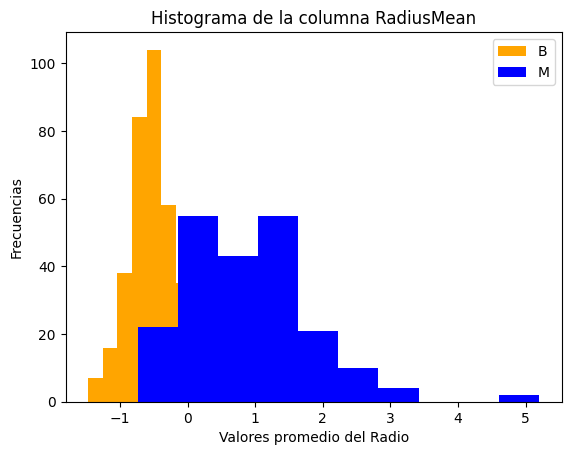

In [523]:
#Crear el Histograma

plt.hist(Rad_Mean_B, color = 'orange', label = 'B')
plt.hist(Rad_Mean_M, color = 'blue', label = 'M')

plt.title('Histograma de la columna RadiusMean')
plt.xlabel('Valores promedio del Radio')
plt.ylabel('Frecuencias')

plt.legend()
plt.show()

In [524]:
#@title 11. Generar gráficos de violín para múltiples características.

#Para usar pd.melt se necesita un dataframe que contenga solo aquellos datos a los que se les quiere sacar el gráfico de violín entonces hacemos eso aquí
ini = X.columns.get_loc('RadiusMean') #Primera columna que necesito en el dataframe
fin = X.columns.get_loc('FractalDimensionMean') #Última columna que necesito en el dataframe

new_dataset = X.iloc[:, ini:fin+1]
new_dataset['Diagnosis'] = y['Diagnosis'] #Le agrego la columna de Diagnosis

new_dataset

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean,Diagnosis
0,1.824496,-1.332631,2.135522,1.824397,0.887384,2.405680,1.828809,1.829790,2.038965,1.699948,M
1,1.378334,-0.533026,1.161469,1.513866,-0.602642,-0.536814,-0.203792,0.631797,-0.349316,-0.228969,M
2,1.440145,-0.115957,1.254969,1.398835,0.390871,0.983610,0.810510,1.805686,0.776325,0.032314,M
3,-0.241333,0.092436,-0.185344,-0.534288,2.455843,3.346862,1.575001,1.580833,4.548702,3.964480,M
4,1.439805,-1.136277,1.462767,1.412437,0.661332,0.059142,0.937554,1.100652,-0.413002,-0.153407,M
...,...,...,...,...,...,...,...,...,...,...,...
564,2.264753,0.303399,2.064310,2.321114,0.835531,0.045849,1.092599,2.005764,-0.937054,-0.490713,M
565,1.514025,2.131157,1.398243,1.503455,-0.337594,-0.160804,0.393939,0.935309,-0.312893,-0.841048,M
566,0.482846,1.054352,0.509456,0.395519,-0.676471,0.324444,0.294727,0.377334,-0.935027,-0.392423,M
567,1.652505,1.753490,1.908218,1.465964,0.927731,3.064903,2.598944,1.911524,1.460970,1.389129,M


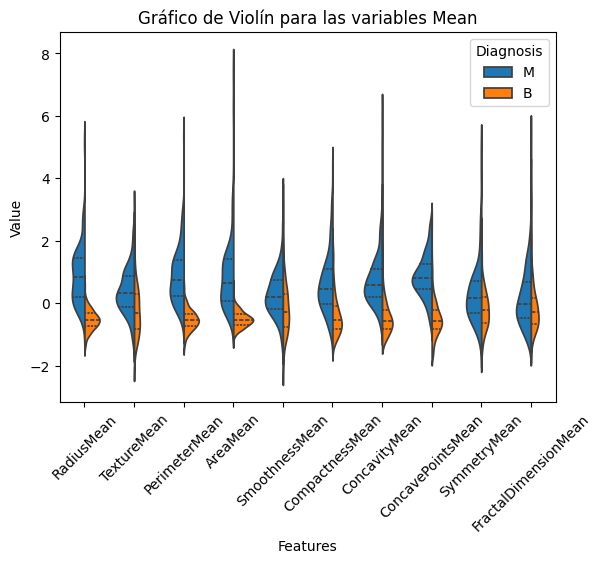

In [525]:
#Hacer el gráfico de violín
data = pd.melt(new_dataset, id_vars="Diagnosis", var_name= "Features", value_name= "Value")
sns.violinplot(data = data, x="Features", y="Value", hue="Diagnosis", split=True, inner="quart", saturation = 1)

plt.title('Gráfico de Violín para las variables Mean')
plt.xticks(rotation=45)
plt.show()

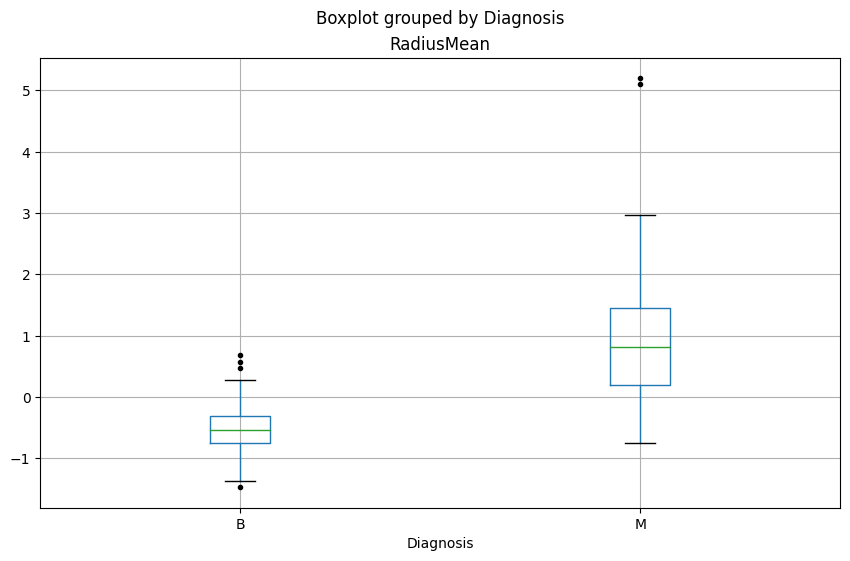

In [526]:
#@title 12. Determinar y eliminar los valores atípicos (outliers) en la columna RadiusMean.

#Hacer el gráfico de caja para visualizar los outliers y saber cuantos son. En el gráfico se ven 6, 4 para B y 2 para M

new_dataset.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(10,6))
plt.show()

In [527]:
'''
Voy a utilizar el ejemplo que se da para hacer los filtros pero, en nuestro caso específico tenemos dos valores (B y M) para los que se quieren hacer los
outliers y cada uno tiene un diagrama de caja distinto, es decir que toca tratarlos por aparte y luego si se pueden volver a juntar.
Para tratarlos por aparte lo que vamos a hacer es definir una lista solo con los valores de la media del radio para los diagnósticos B y lo mismo para M,
y para cada uno de esos se sacan los quantiles y se construye el filtro. Luego lo que hacemos es aplicar ambos filtro al dataframe y concatenarlos.
'''

#Hacer los filtros correspondientes para B y M
Rad_B = new_dataset.RadiusMean[new_dataset.Diagnosis == 'B']
Q1B = Rad_B.quantile(0.25)
Q3B = Rad_B.quantile(0.75)

IQRB = Q3B - Q1B
FiltB = (~((Rad_B < (Q1B - 1.5 * IQRB)) | (Rad_B > (Q3B + 1.5 * IQRB))))

#-----------------------------------------------------------------------
Rad_M = new_dataset.RadiusMean[new_dataset.Diagnosis == 'M']
Q1M = Rad_M.quantile(0.25)
Q3M = Rad_M.quantile(0.75)

IQRM = Q3M - Q1M
FiltM = (~((Rad_M < (Q1M - 1.5 * IQRM)) | (Rad_M > (Q3M + 1.5 * IQRM))))

new_dataset2 = new_dataset[pd.concat([FiltB,FiltM])]
new_dataset2 #Este sería el dataframe ya filtrado, donde se ve que ya no hay 569 datos sino 563, es decir que se filtraron 6 como se esperaba

<ipython-input-527-aa6f1e28bdb6>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_dataset2 = new_dataset[pd.concat([FiltB,FiltM])]


,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean,Diagnosis
0,1.824496,-1.332631,2.135522,1.824397,0.887384,2.405680,1.828809,1.829790,2.038965,1.699948,M
1,1.378334,-0.533026,1.161469,1.513866,-0.602642,-0.536814,-0.203792,0.631797,-0.349316,-0.228969,M
2,1.440145,-0.115957,1.254969,1.398835,0.390871,0.983610,0.810510,1.805686,0.776325,0.032314,M
3,-0.241333,0.092436,-0.185344,-0.534288,2.455843,3.346862,1.575001,1.580833,4.548702,3.964480,M
4,1.439805,-1.136277,1.462767,1.412437,0.661332,0.059142,0.937554,1.100652,-0.413002,-0.153407,M
...,...,...,...,...,...,...,...,...,...,...,...
564,2.264753,0.303399,2.064310,2.321114,0.835531,0.045849,1.092599,2.005764,-0.937054,-0.490713,M
565,1.514025,2.131157,1.398243,1.503455,-0.337594,-0.160804,0.393939,0.935309,-0.312893,-0.841048,M
566,0.482846,1.054352,0.509456,0.395519,-0.676471,0.324444,0.294727,0.377334,-0.935027,-0.392423,M
567,1.652505,1.753490,1.908218,1.465964,0.927731,3.064903,2.598944,1.911524,1.460970,1.389129,M


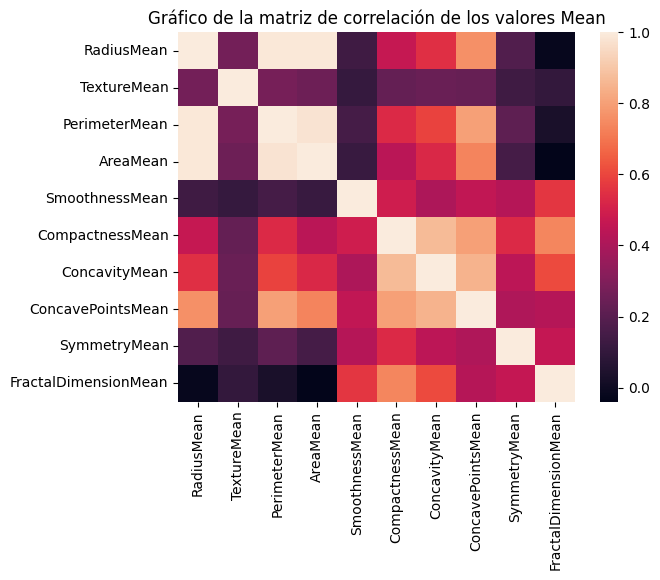

In [528]:
#@title 13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.
corr = new_dataset2.iloc[:,:-1].corr()
sns.heatmap(corr)

plt.title('Gráfico de la matriz de correlación de los valores Mean')
plt.show()

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Para entender como son las distribuciones de los datos se pueden hacer gráficos de dispersión, diagramas circulares y de torta, gráficos de velas, Tablas de columna (para columnas como el tipo de cancer).
